In [193]:
import numpy as np
import pandas as pd
import json
import requests
import pprint
import re
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv



In [194]:
health = pd.read_csv("2009_Health_Disparities_Report_and_data.csv")

adjustedRates = pd.read_csv("Age-Adjusted_Incidence_Rates_for_All_Cancer_Sites_by_Jurisdiction__Gender__and_Race__Maryland_2009.csv")

pop = requests.get("https://data.cdc.gov/api/views/jwta-jxbg/rows.json?accessType=DOWNLOAD").json()
popText = requests.get("https://data.cdc.gov/api/views/jwta-jxbg/rows.json?accessType=DOWNLOAD").text

delayXML = requests.get("https://data.cdc.gov/api/views/dmzy-x2ad/rows.xml?accessType=DOWNLOAD").text
deXML = BeautifulSoup(delayXML, 'lxml')

# 2009 Health Disparities Report (csv)
The US Census updated the results from the 2020 census to represent 2021.  We'll examine this data to compare the population estimates for each of the areas and states in the years 2020 and 2021. 

In [195]:
health

Race & Ethnicity  Median household income  \
0         Hispanics/Latinos                  35941.0   
1  African Americans/Blacks                  34563.0   
2          American Indians                  41250.0   
3  Asians/Pacific Islanders                  55053.0   
4           All Coloradans                   52015.0   

   Percent of population living below poverty  High school graduation rate  \
0                                        23.1                         57.1   
1                                        22.7                         65.4   
2                                        24.2                         58.9   
3                                        12.6                         83.5   
4                                        12.0                         75.0   

   Infant mortality (infant deaths per 1,000 live births)  \
0                                                7.2        
1                                               16.9        
2                                                5.0        
3                                                4.0        
4                                                6.1        

   Low birth weight births  Unintended pregnancy  \
0                      8.5                  47.0   
1                     15.2                  53.4   
2                     10.1                   NaN   
3                     10.1                  38.4   
4                      9.0                  39.7   

   Births to teens ages 15-17 (births per 1,000 population, 2006)  \
0                                               69.6                
1                                               26.9                
2                                               22.2                
3                                               10.5                
4                                               23.7                

   Women reporting 3 or more stressors during pregnancy  \
0                                               27.9      
1                                               43.9      
2                                                NaN      
3                                               10.9      
4                                               27.0      

   Women who drank during last three months of pregnancy  ...  \
0                                                6.1      ...   
1                                                6.2      ...   
2                                                NaN      ...   
3                                                6.9      ...   
4                                               10.8      ...   

   No health insurance  \
0                 40.3   
1                 16.4   
2                 33.7   
3                 14.6   
4                 16.6   

   Women 40+ who have not had a mammogram in last 2 years  \
0                                               36.8        
1                                               27.8        
2                                                NaN        
3                                               14.9        
4                                               28.4        

   Women who have not had a pap test in last 3 years  \
0                                               12.5   
1                                               11.7   
2                                                NaN   
3                                               13.1   
4                                               13.2   

   Have high blood pressure  Have diabetes  Have asthma  \
0                      15.4            6.2          6.5   
1                      30.1            9.1         11.2   
2                      21.5            5.3          9.5   
3                      16.3            4.0          5.3   
4                      20.7            4.9          8.1   

   Tuberculosis (Incidence rates per 100,000 population)  \
0                                                6.3       
1                           

# Analyzing median income by race in 2009 Health Disparities Report (csv)



In [196]:
#variable to store the least median
leastMed = 99999999999
#variable to store the name of the least median race
leastRace = ' '

#open the csv
with open("2009_Health_Disparities_Report_and_data.csv") as h:
    reader = csv.reader(h)
    #skip header 
    next(reader)
    #iterate through the row
    for row in reader:
        #store every variable that is less than the least median
        if(float(row[1]) < float(leastMed)):
            leastMed = row[1]
            #store the associated name
            leastRace = row[0]
    
    print(leastRace + " have the lowest median income with an average of $" + leastMed)

    

African Americans/Blacks have the lowest median income with an average of $34563.00


Since African Americans have the lowest median income, it does not surprise me that this directly correlates to the amount of legitament health services that would be at their disposel.

In [197]:
#create variable for the highest median
mostMed = 0
#create variable to store the highest median name
mostRace = ' '

#open csv
with open("2009_Health_Disparities_Report_and_data.csv") as h:
    reader = csv.reader(h)
    #skip header
    next(reader)
    #iterate through the row
    for row in reader:
        #store every variable that is greater than the most median
        if(float(row[1]) > float(mostMed)):
            mostMed = row[1]
            mostRace = row[0]
    
    
    print(mostRace + " have the highest median income with an average of $" + mostMed)

Asians/Pacific Islanders have the highest median income with an average of $55053.00


The Asian/Pacific Islander population have the highest median income, which means that they could afford better quality of health care on average.

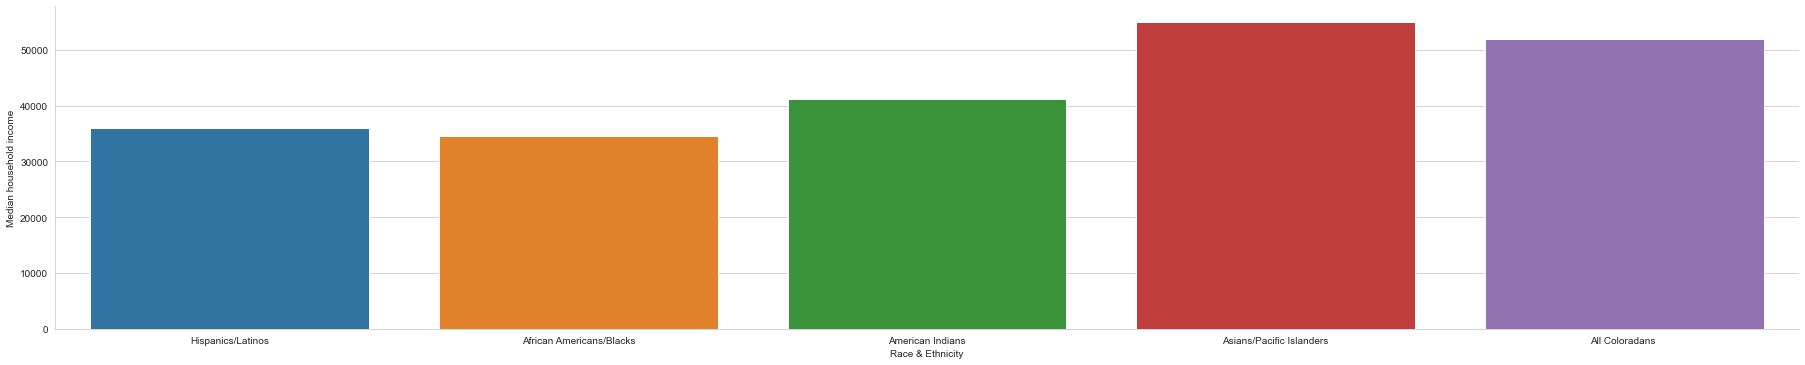

In [198]:
sb.set_style(style = "whitegrid")
#set race for x axis and income for y axis
#helps visably understand the data
sb.catplot(x = "Race & Ethnicity", y = "Median household income", data = health, kind = "bar", aspect = 5)

In [199]:
#store data in variable labeled "income"
income = health[['Race & Ethnicity', 'Median household income']]

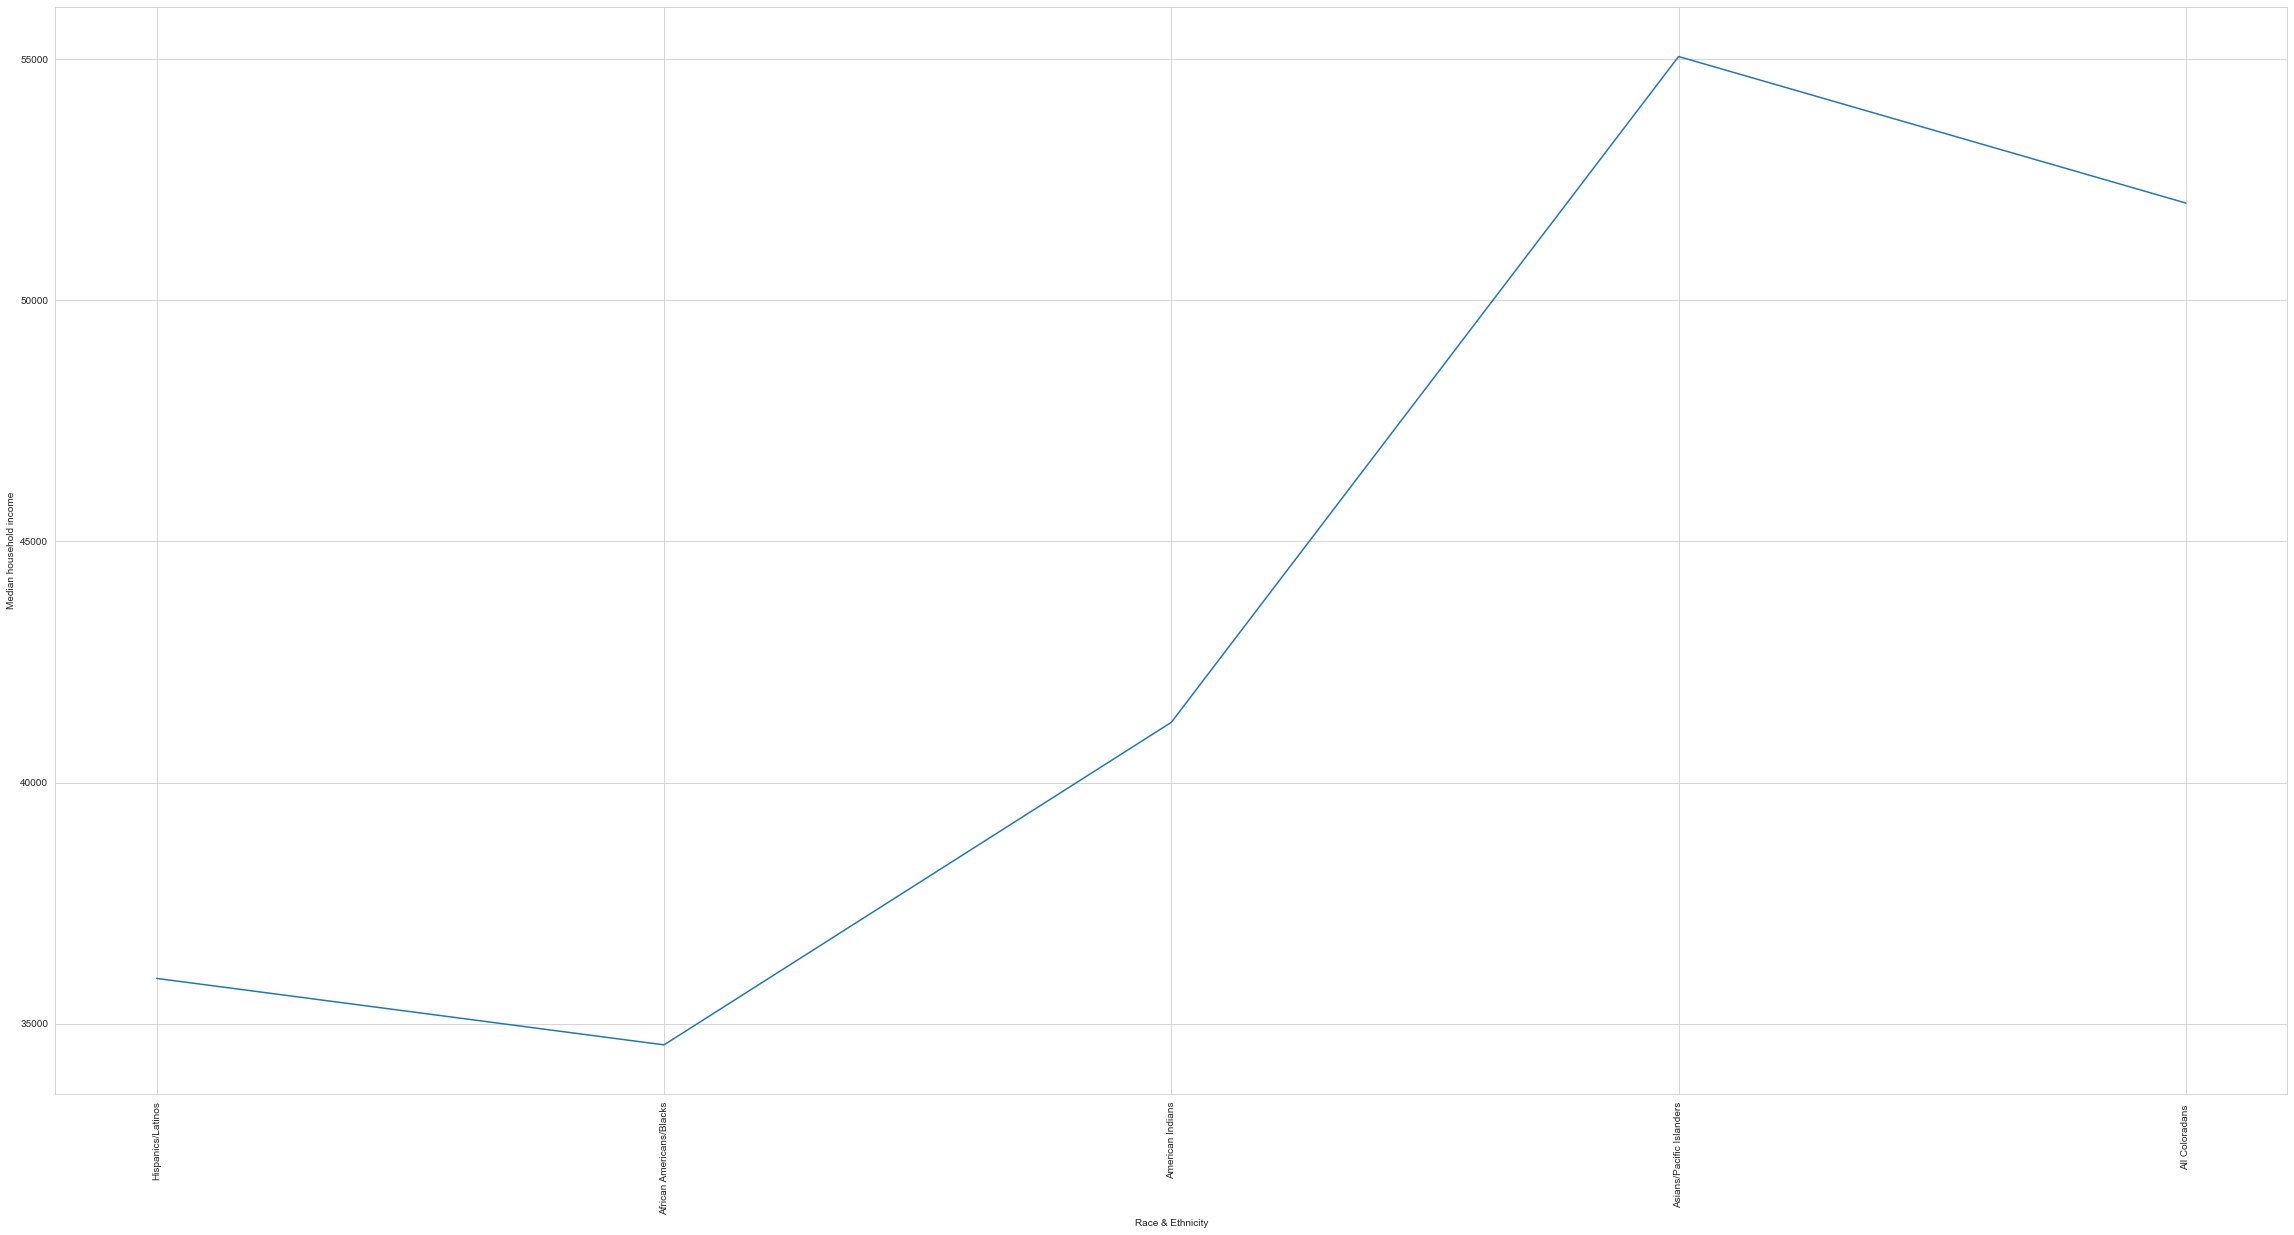

In [200]:
plt.figure(figsize = (40,20))
plt.xticks(rotation = 90)
ax = sb.lineplot(data = income, x = "Race & Ethnicity", y = "Median household income")
plt.show()

# Analyzing poverty percentage by race in 2009 Health Disparities Report (csv)



In [201]:
leastPoverty = 99999999999
leastRace = ' '

with open("2009_Health_Disparities_Report_and_data.csv") as h:
    reader = csv.reader(h)
    next(reader)
    for row in reader:
        #needed to compare between races and not "all coloradans"
        if(float(row[2]) < float(leastPoverty) and float(row[2]) > 12.0):
            leastPoverty = row[2]
            leastRace = row[0]
    
   
    print(leastRace + " have the lowest percentage of poverty with an average of " + leastPoverty + "%")

Asians/Pacific Islanders have the lowest percentage of poverty with an average of 12.6%


In [202]:
mostPoverty = 0
mostRace = ' '

with open("2009_Health_Disparities_Report_and_data.csv") as h:
    reader = csv.reader(h)
    next(reader)
    for row in reader:
        #needed to compare between races and not "all coloradans"
        if(float(row[2]) > float(leastPoverty) and float(row[2]) > 12.0):
            mostPoverty = row[2]
            mostRace = row[0]
    
    print(mostRace + " have the highest percentage of poverty with an average of " + mostPoverty + "%")

American Indians have the highest percentage of poverty with an average of 24.2%


Historically, this tends to make sense because of the trials and tribulations the Native American population has had to go through over the years. Since the majority of Native Americans live on their own reservations, their poverty percentage is higher than most.

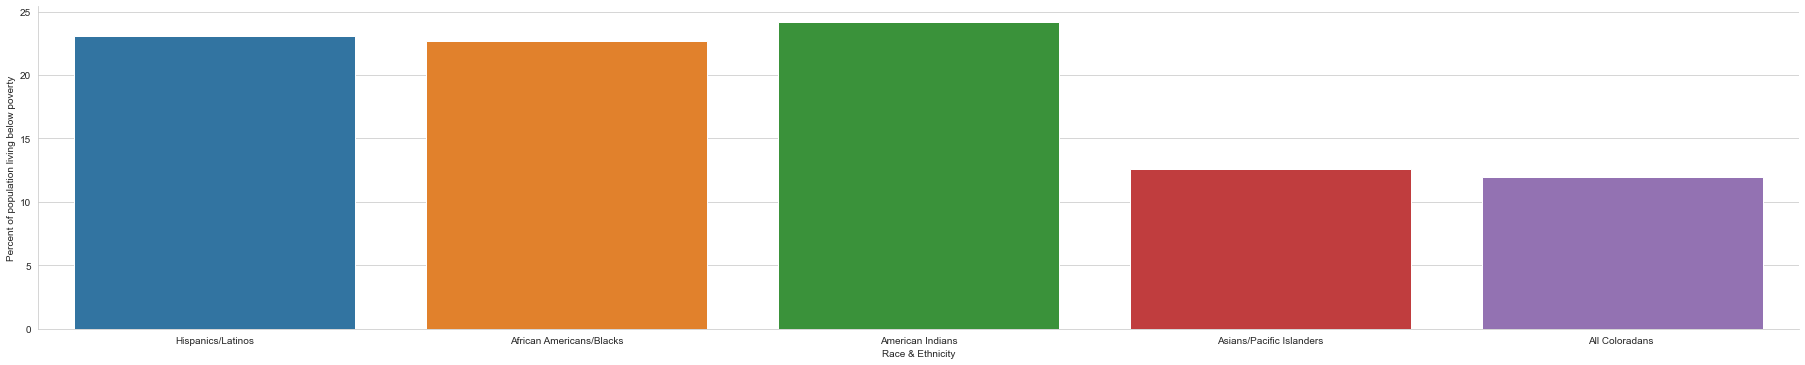

In [203]:
#sb.displot(health['Percent of population living below poverty'], bins = 20)
sb.set_style(style = "whitegrid")
sb.catplot(x = "Race & Ethnicity", y = "Percent of population living below poverty", data = health, kind = "bar", aspect = 5)

In [204]:
poverty = health[['Race & Ethnicity', 'Percent of population living below poverty']]

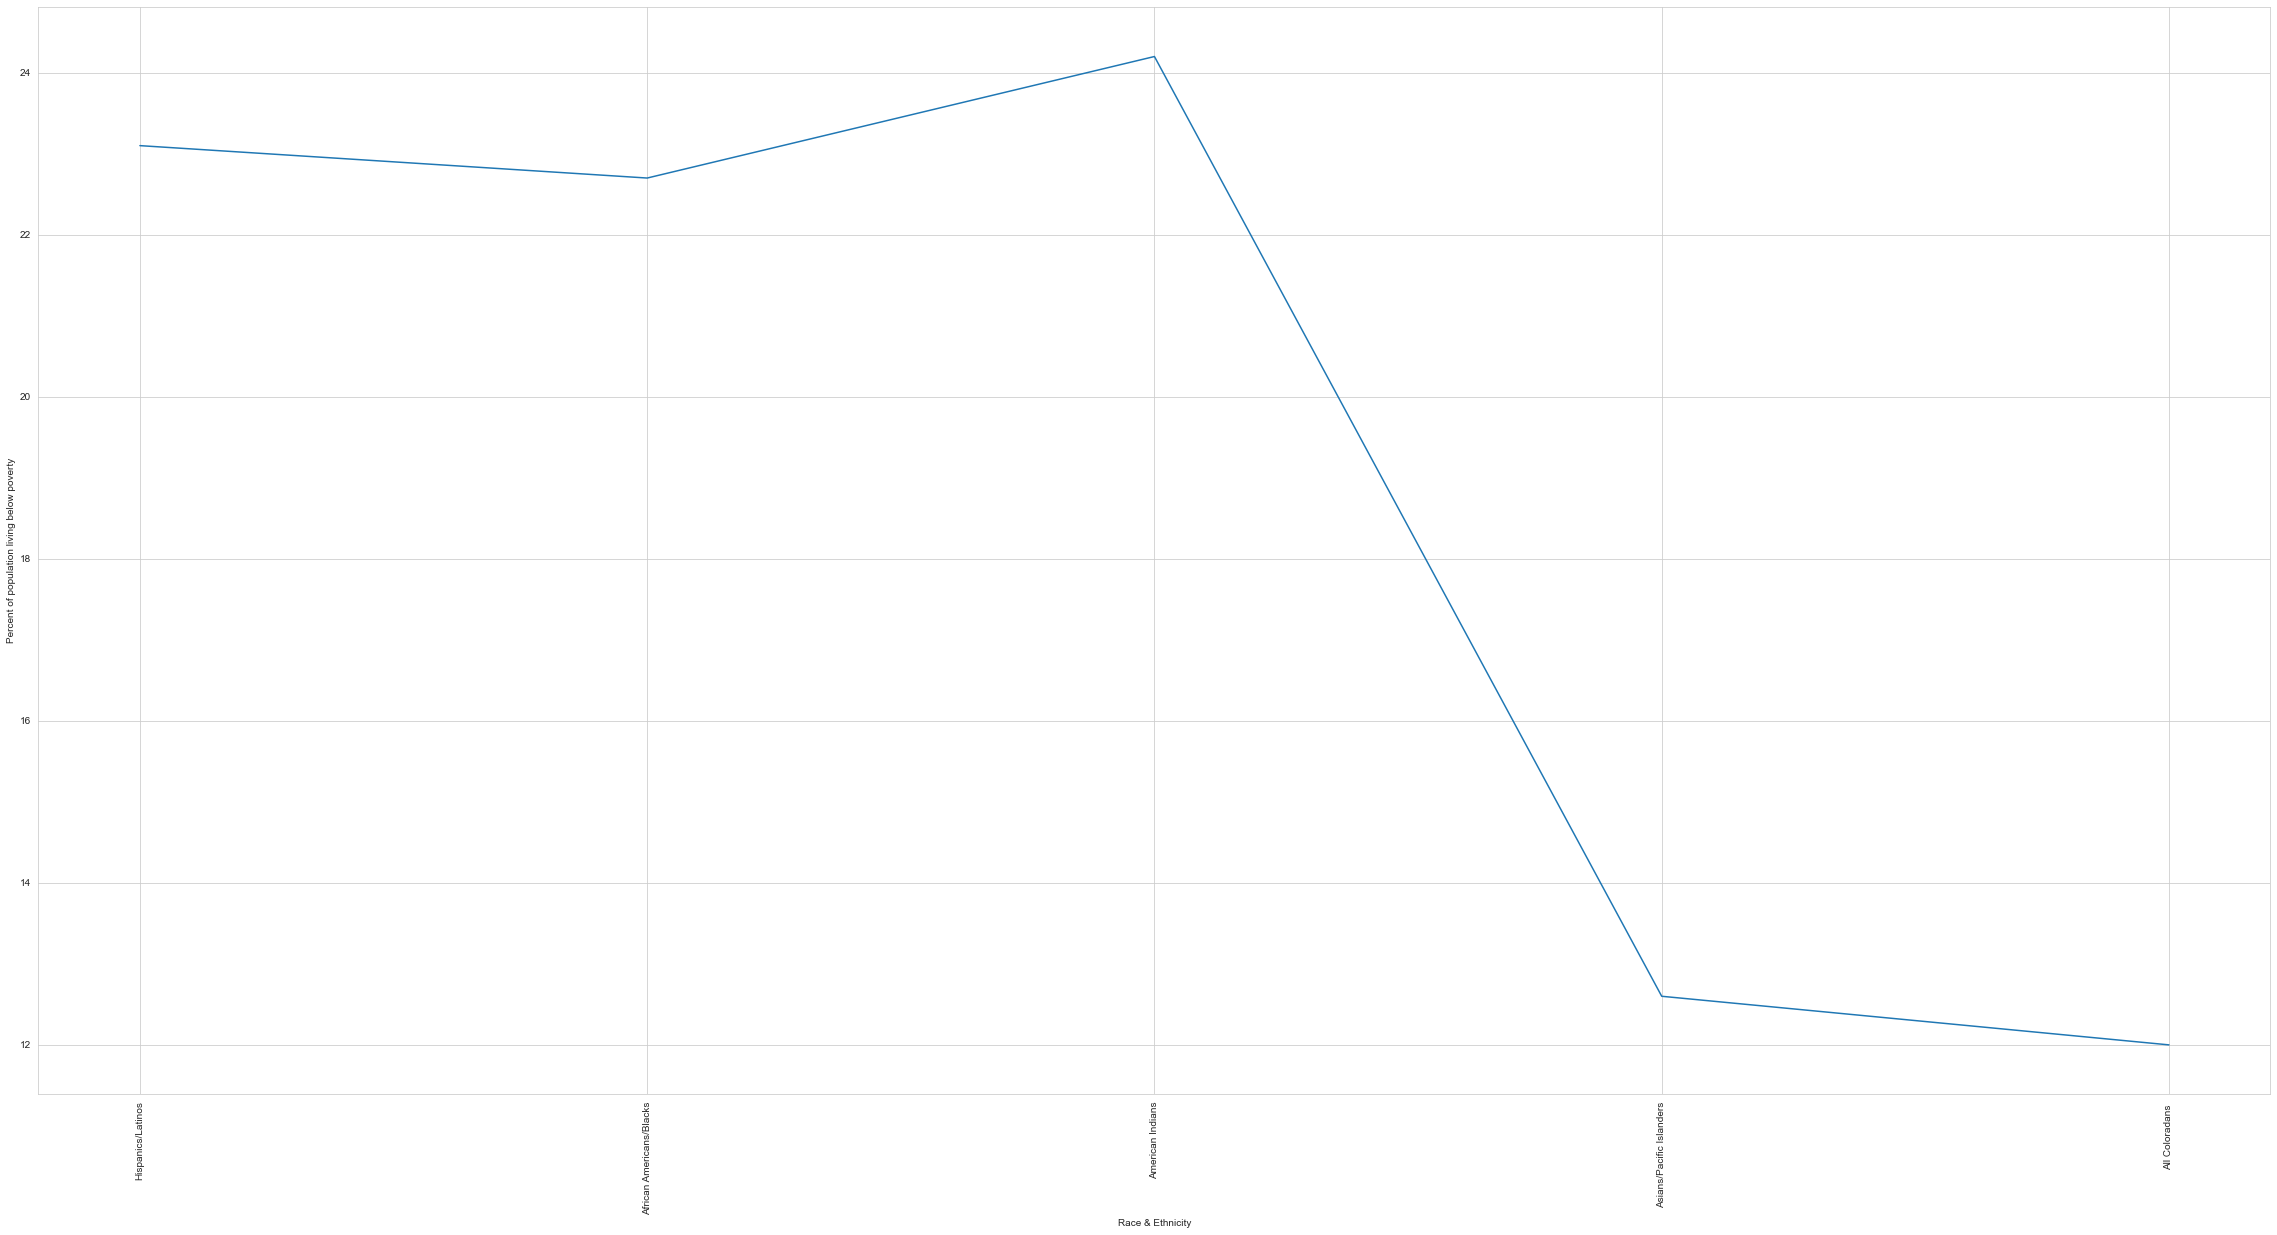

In [205]:
plt.figure(figsize = (40,20))
plt.xticks(rotation = 90)
ax = sb.lineplot(data = poverty, x = "Race & Ethnicity", y = "Percent of population living below poverty")
plt.show()

# Analyzing infant mortality rates by race in 2009 Health Disparities Report (csv)




In [206]:
leastDeath = 99999999999
leastRace = ' '

with open("2009_Health_Disparities_Report_and_data.csv") as h:
    reader = csv.reader(h)
    next(reader)
    for row in reader:
        #needed to compare between races and not "all coloradans"
        if(float(row[4]) < float(leastPoverty) and float(row[2]) > 12.0):
            leastDeath = row[4]
            leastRace = row[0]
    
    print(leastRace + " have the lowest rate of infant mortality rates with an average of " + leastPoverty + " per 1000 births.")

Asians/Pacific Islanders have the lowest rate of infant mortality rates with an average of 12.6 per 1000 births.


Based on the data that I analzyed previously, this fact does not surprise me because since Asians/Pacific Islanders have a higher median income along with the lowest poverty rate, it would mean that they have access to better health care for their new born infants.

In [207]:
mostDeath = 0
mostRace = ' '

with open("2009_Health_Disparities_Report_and_data.csv") as h:
    reader = csv.reader(h)
    next(reader)
    for row in reader:
        #needed to compare between races and not "all coloradans"
        if(float(row[4]) > float(leastPoverty) and float(row[2]) > 12.0):
            mostDeath = row[4]
            mostRace = row[0]
    
    print(mostRace + " have the highest rate of infant mortality rates with an average of " + mostPoverty + " per 1000 births.")

African Americans/Blacks have the highest rate of infant mortality rates with an average of 24.2 per 1000 births.


Since the African American population has the second highest percentage for poverty and also the lowest median income, it should not be surprising that they have the highest infant mortality rates because they have less access to adequate health care.

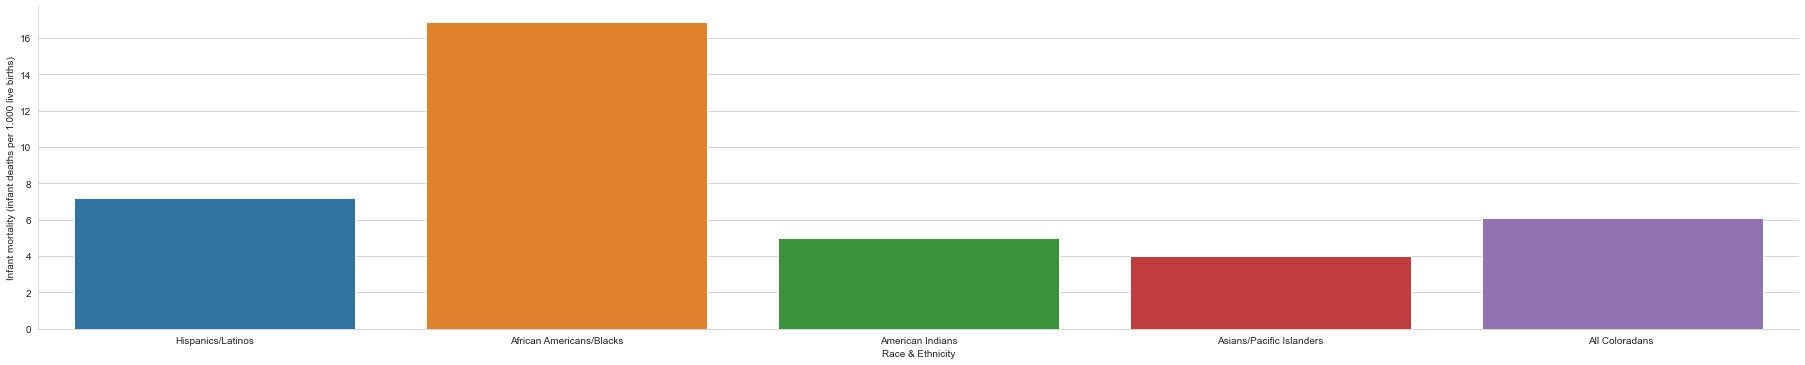

In [208]:
#sb.displot(health['Infant mortality (infant deaths per 1,000 live births)'], bins = 9)
sb.set_style(style = "whitegrid")
sb.catplot(x = "Race & Ethnicity", y = "Infant mortality (infant deaths per 1,000 live births)", data = health, kind = "bar", aspect = 5)

In [209]:
mortality = health[['Race & Ethnicity', 'Infant mortality (infant deaths per 1,000 live births)']]

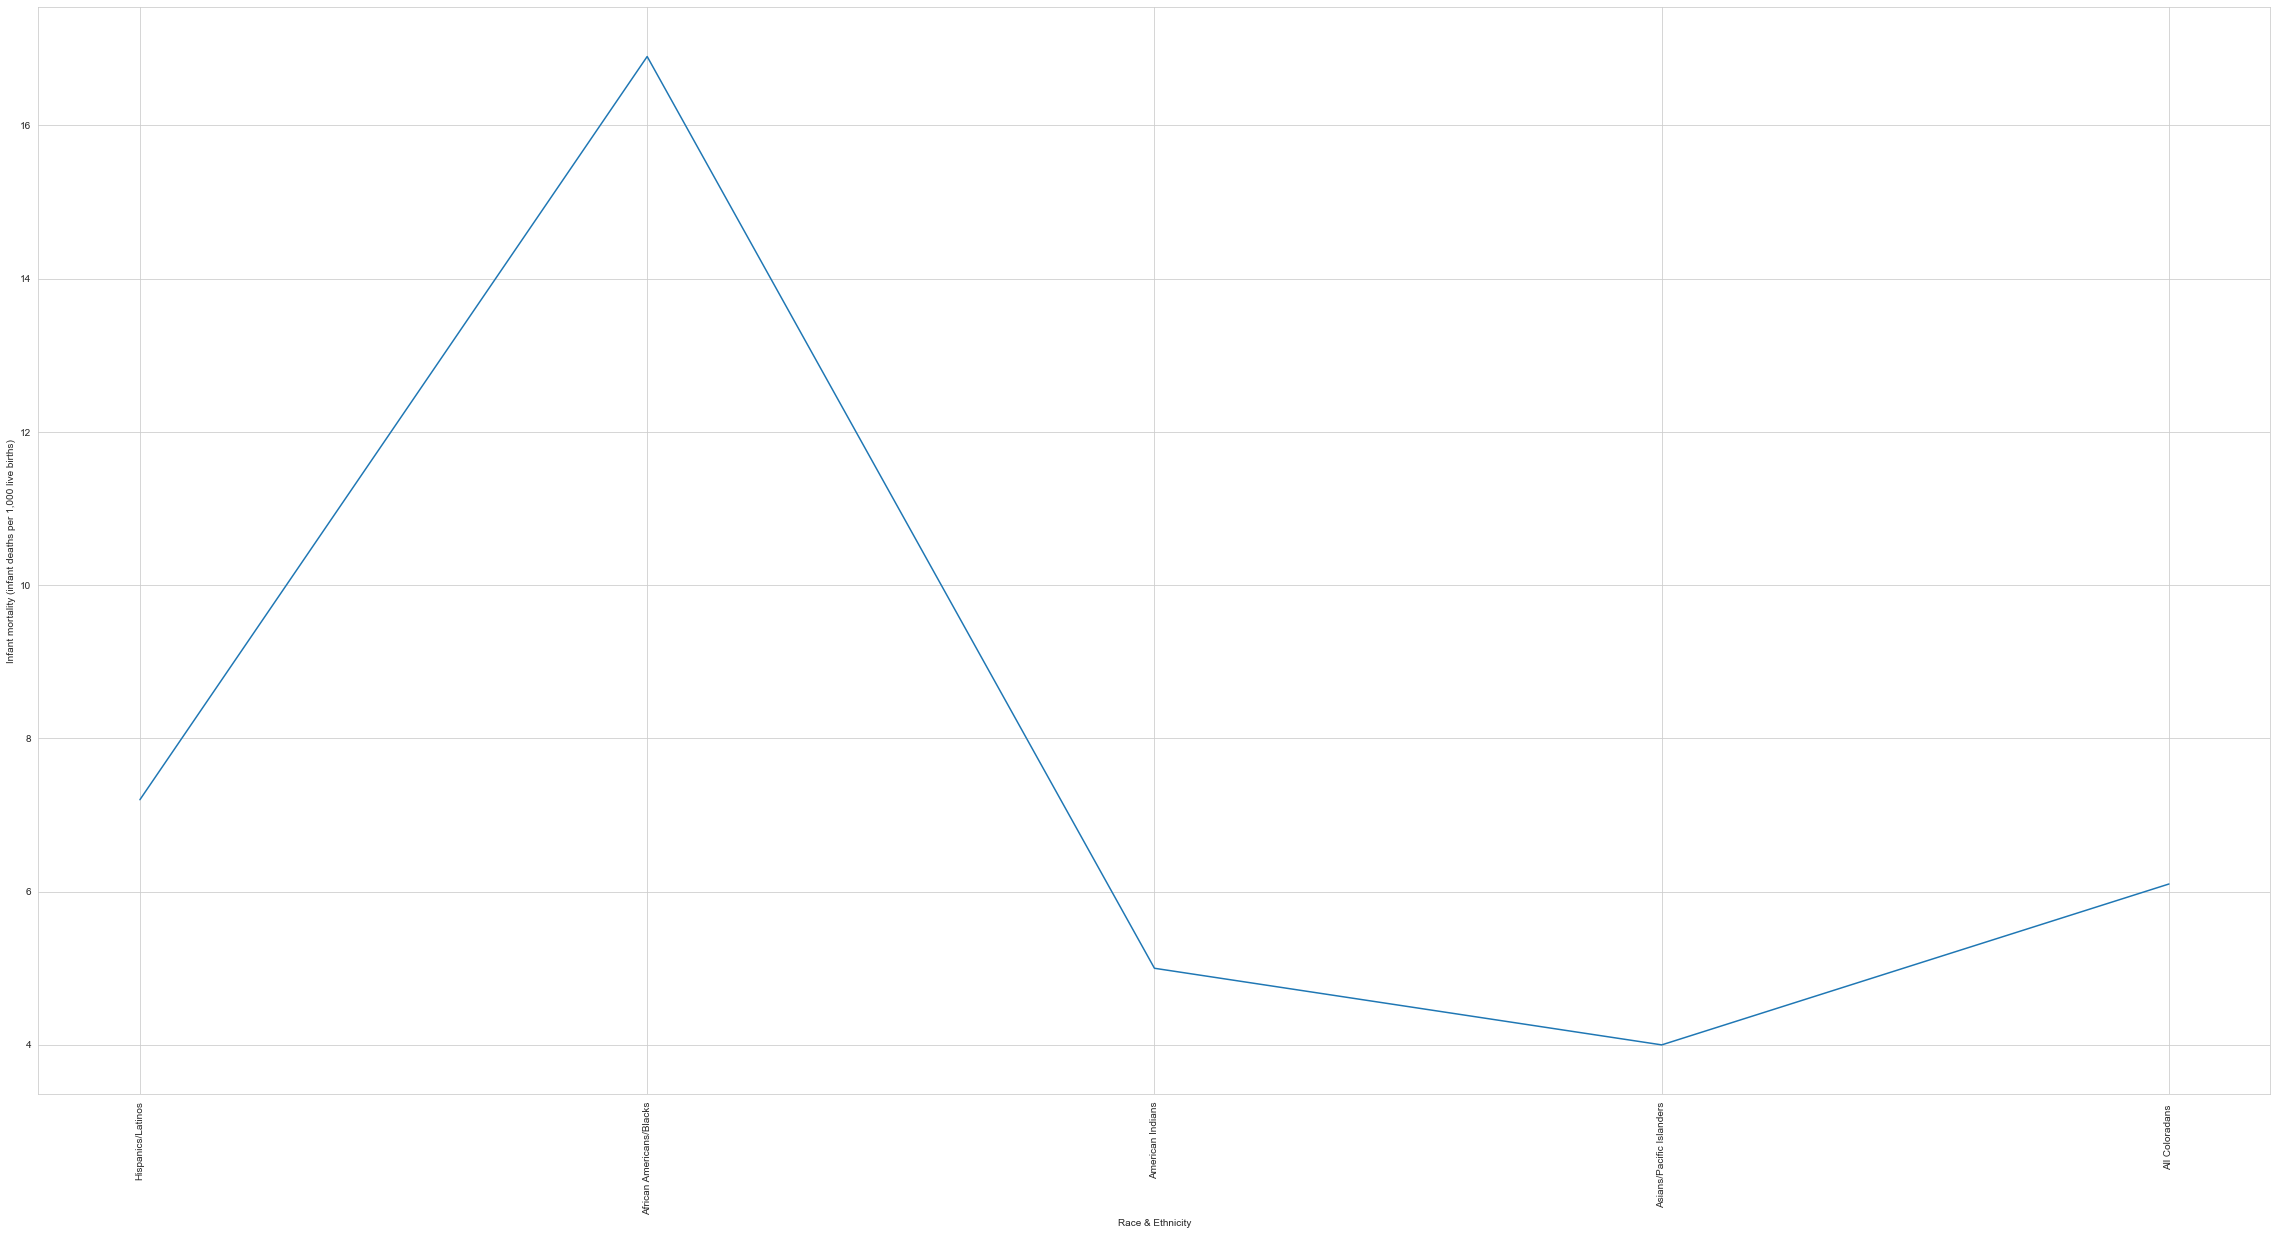

In [210]:
plt.figure(figsize = (40,20))
plt.xticks(rotation = 90)
ax = sb.lineplot(data = mortality, x = "Race & Ethnicity", y = "Infant mortality (infant deaths per 1,000 live births)")
plt.show()

# Analyzing percentage of population that does not have health insurance by race in 2009 Health Disparities Report (csv)





In [216]:
leastI = 99999999999
leastRace = ' '

with open("2009_Health_Disparities_Report_and_data.csv") as h:
    reader = csv.reader(h)
    next(reader)
    for row in reader:
        #needed to compare between races and not "all coloradans"
        if(float(row[19]) < float(leastI) and float(row[19]) > 16.6):
            leastI = row[19]
            leastRace = row[0]
    
      
    print(leastRace + " have the lowest percent of not owning health care with an average of " + leastI + "%.")

American Indians have the lowest percent of not owning health care with an average of 33.7%.


In [217]:
mostI = 0
mostRace = ' '

with open("2009_Health_Disparities_Report_and_data.csv") as h:
    reader = csv.reader(h)
    next(reader)
    for row in reader:
        #needed to compare between races and not "all coloradans"
        if(float(row[19]) > float(mostI) and float(row[19]) > 16.6):
            mostI = row[19]
            mostRace = row[0]
    
    print(mostRace + " have the highest percent of not owning health care with an average of " + mostI + "%.")

Hispanics/Latinos have the highest percent of not owning health care with an average of 40.3%.


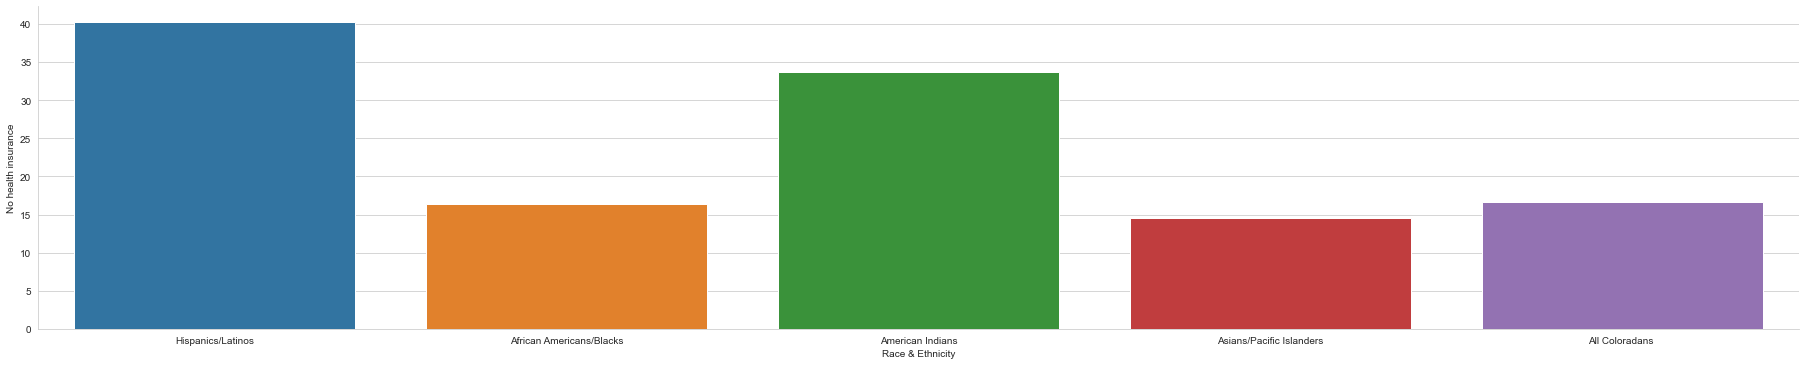

In [49]:
#sb.displot(health['No health insurance'], bins = 20)
sb.set_style(style = "whitegrid")
sb.catplot(x = "Race & Ethnicity", y = "No health insurance", data = health, kind = "bar", aspect = 5)

In [37]:
insurance = health[['Race & Ethnicity', 'No health insurance']]

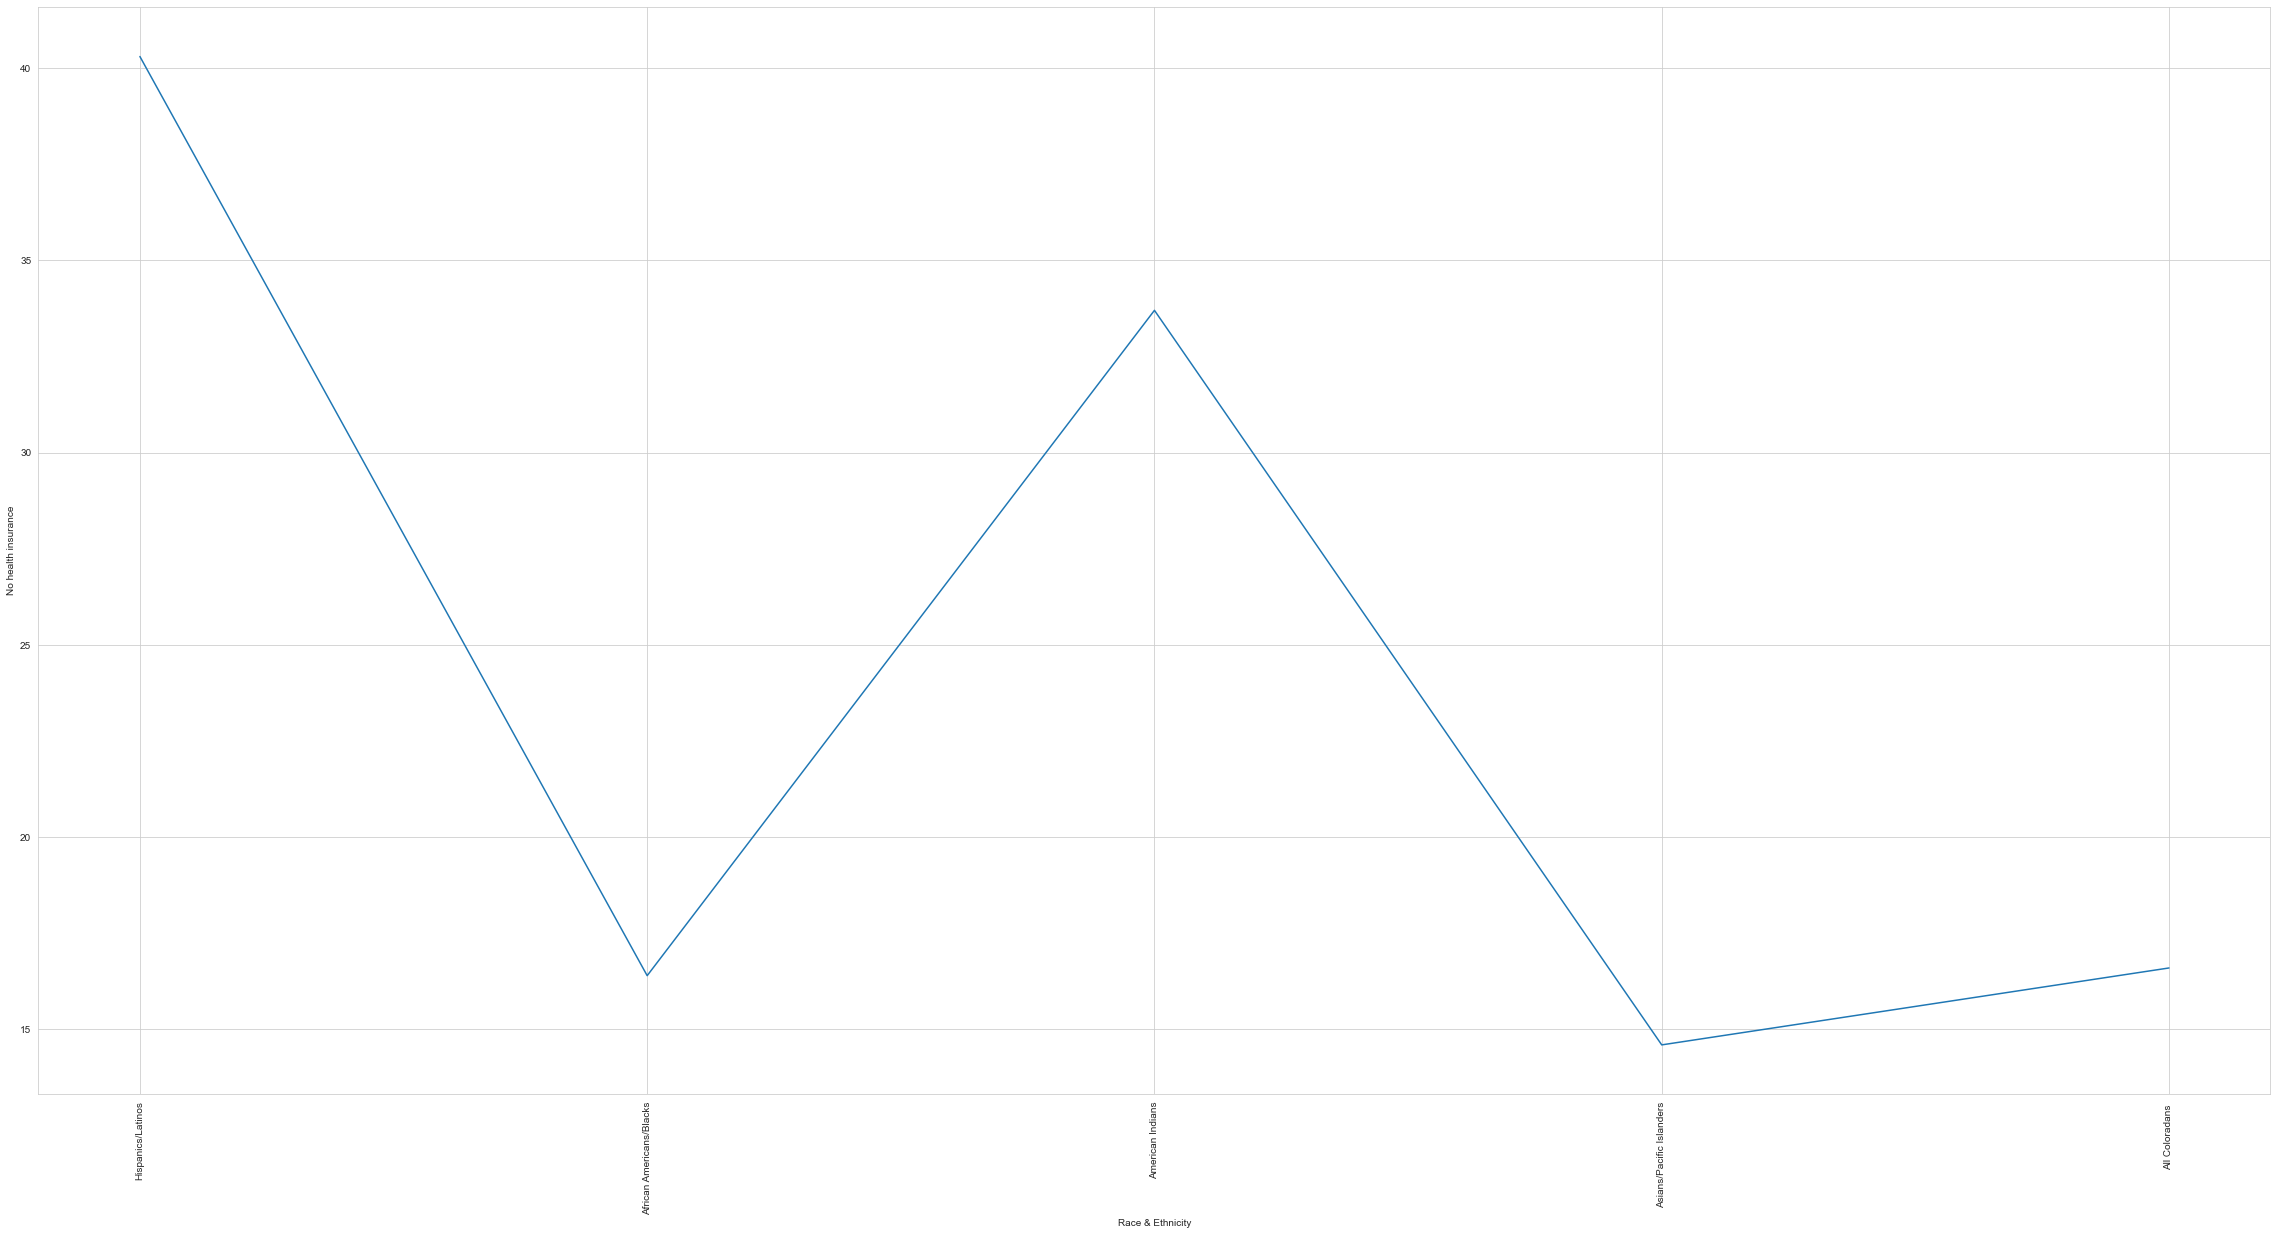

In [38]:
plt.figure(figsize = (40,20))
plt.xticks(rotation = 90)
ax = sb.lineplot(data = insurance, x = "Race & Ethnicity", y = "No health insurance")
plt.show()

# Age Adjusted Incidence Rates for All Cancer Sites by Jurisdiction Gender and Race Maryland 2009
The US Census updated the results from the 2020 census to represent 2021.  We'll examine this data to compare the population estimates for each of the areas and states in the years 2020 and 2021. 

In [39]:
adjustedRates

Jurisdiction  Total  Males  Females  Whites  Blacks  Other Race
0           Maryland  443.7  500.4    405.0   446.5   431.8       356.1
1           Allegany  532.3  588.7    503.9   537.0     NaN         NaN
2       Anne Arundel  472.8  530.9    427.7   476.1   464.9       357.9
3     Baltimore City  471.5  564.7    410.8   483.5   462.3       387.4
4   Baltimore County  476.3  516.7    450.6   484.1   466.4       337.0
5            Calvert  412.9  424.8    396.3   423.4   356.8         NaN
6           Caroline  428.9  480.9    395.7   442.7   367.9         NaN
7            Carroll  440.7  478.2    417.1   440.7   386.7         NaN
8              Cecil  430.5  483.3    392.8   434.9   365.2         NaN
9            Charles  387.9  457.1    327.3   376.1   403.7       402.6
10        Dorchester  389.3  441.4    353.6   369.2   445.2         NaN
11         Frederick  463.0  496.6    447.6   465.7   474.9       300.1
12           Garrett  409.3  350.0    470.4   405.9     0.0         NaN
13           Harford  513.4  560.3    481.3   508.5   519.3       509.7
14            Howard  387.3  401.5    378.8   388.3   389.1       307.2
15              Kent  457.3  531.8    410.8   443.4   499.4         NaN
16        Montgomery  389.2  437.1    359.6   387.6   406.8       331.5
17   Prince George's  387.6  458.9    341.5   336.9   408.4       395.0
18      Queen Anne's  452.6  513.2    406.4   459.9   393.4         NaN
19      Saint Mary's  382.9  406.5    357.4   413.3   252.1         NaN
20          Somerset  470.8  625.8    370.3   500.3   414.7         NaN
21            Talbot  471.8  581.3    382.4   474.3   401.5         NaN
22        Washington  471.7  532.6    440.0   468.4   455.7         NaN
23          Wicomico  550.4  715.4    429.7   555.9   534.3         NaN
24         Worcester  500.4  584.7    432.4   472.3   442.7      3063.9

# Insurance Rates gap between men and women in the U.S

In [229]:
#store the value for insurance rates for men
maleRates = 0
#store the value for insurance rates for women
femaleRates = 0

with open("Age-Adjusted_Incidence_Rates_for_All_Cancer_Sites_by_Jurisdiction__Gender__and_Race__Maryland_2009.csv") as a:
    reader = csv.reader(a)
    next(reader)
    for row in reader:
        #add all the values in the row together
        maleRates += float(row[2])
        femaleRates += float(row[3])
    
    #take the average of the values
    avMen = maleRates / 25
    avWomen = femaleRates / 25
    
    #format the number to two decimal places
    fMen = "{:.2f}".format(avMen)
    fWomen = "{:.2f}".format(avWomen)
    
    print("The average insurance rates for Men in the U.S is $" , fMen)
    print("The average insurance rates for Women in the U.S is $", fWomen)

The average insurance rates for Men in the U.S is $ 506.51
The average insurance rates for Women in the U.S is $ 407.58


This shows that the average rate gap between men and women in the U.S is about $100

In [41]:
ratesGM = adjustedRates[['Jurisdiction', 'Males']]
ratesGF = adjustedRates[['Jurisdiction', 'Females']]

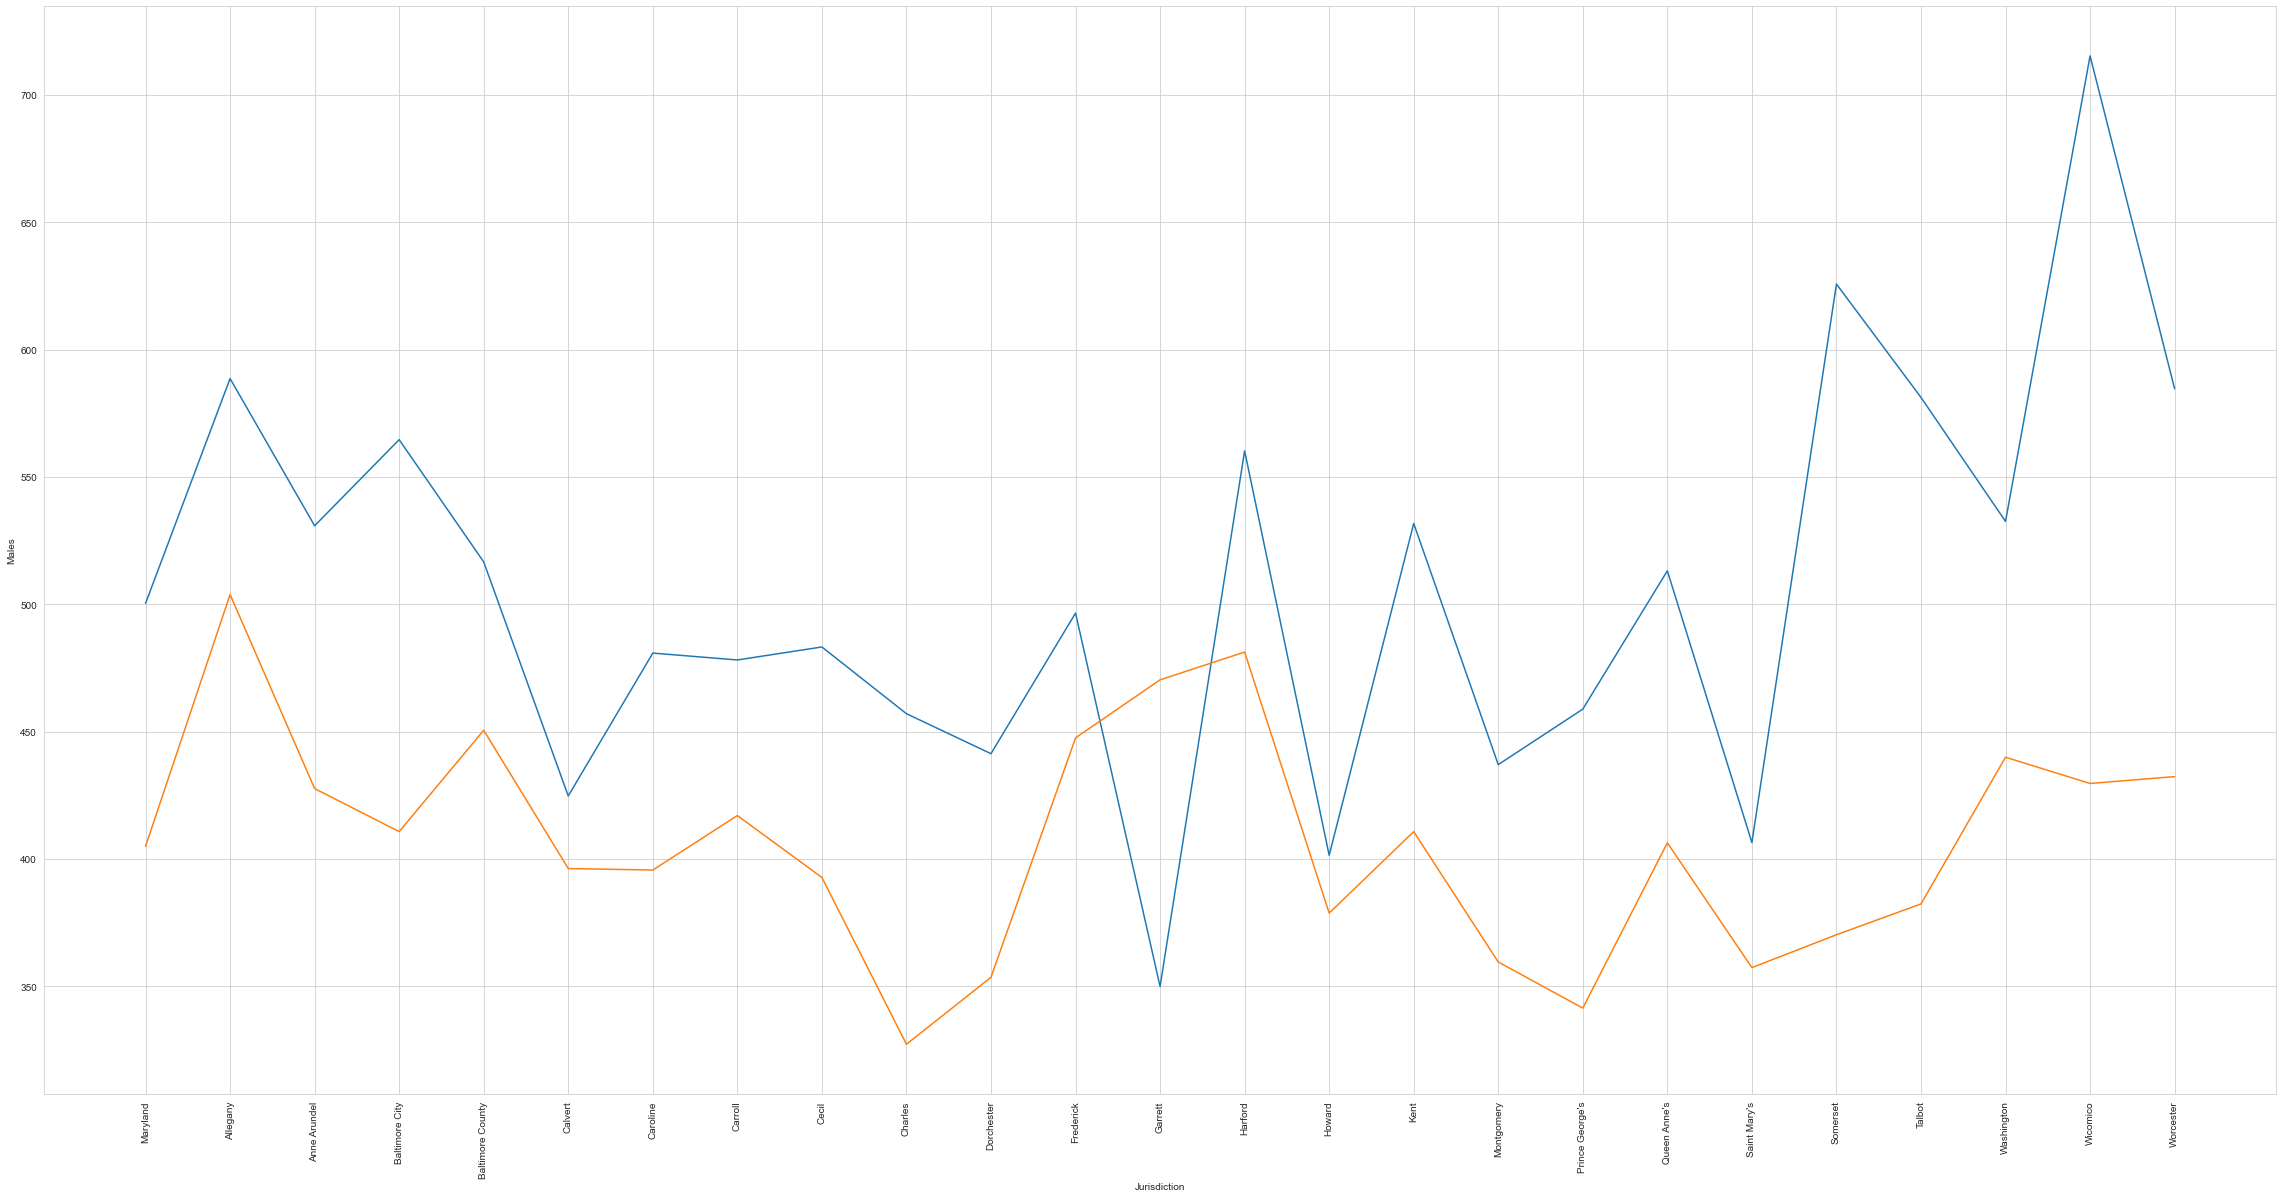

In [42]:
plt.figure(figsize = (40,20))
plt.xticks(rotation = 90)
ax = sb.lineplot(data = ratesGM, x = "Jurisdiction", y = "Males")
ax = sb.lineplot(data = ratesGF, x = "Jurisdiction", y = "Females")
plt.show()

# Insurance Rates gaps between races

In [43]:
ratesW = adjustedRates[['Jurisdiction', 'Whites']]
ratesB = adjustedRates[['Jurisdiction', 'Blacks']]
ratesO = adjustedRates[['Jurisdiction', 'Other Race']]

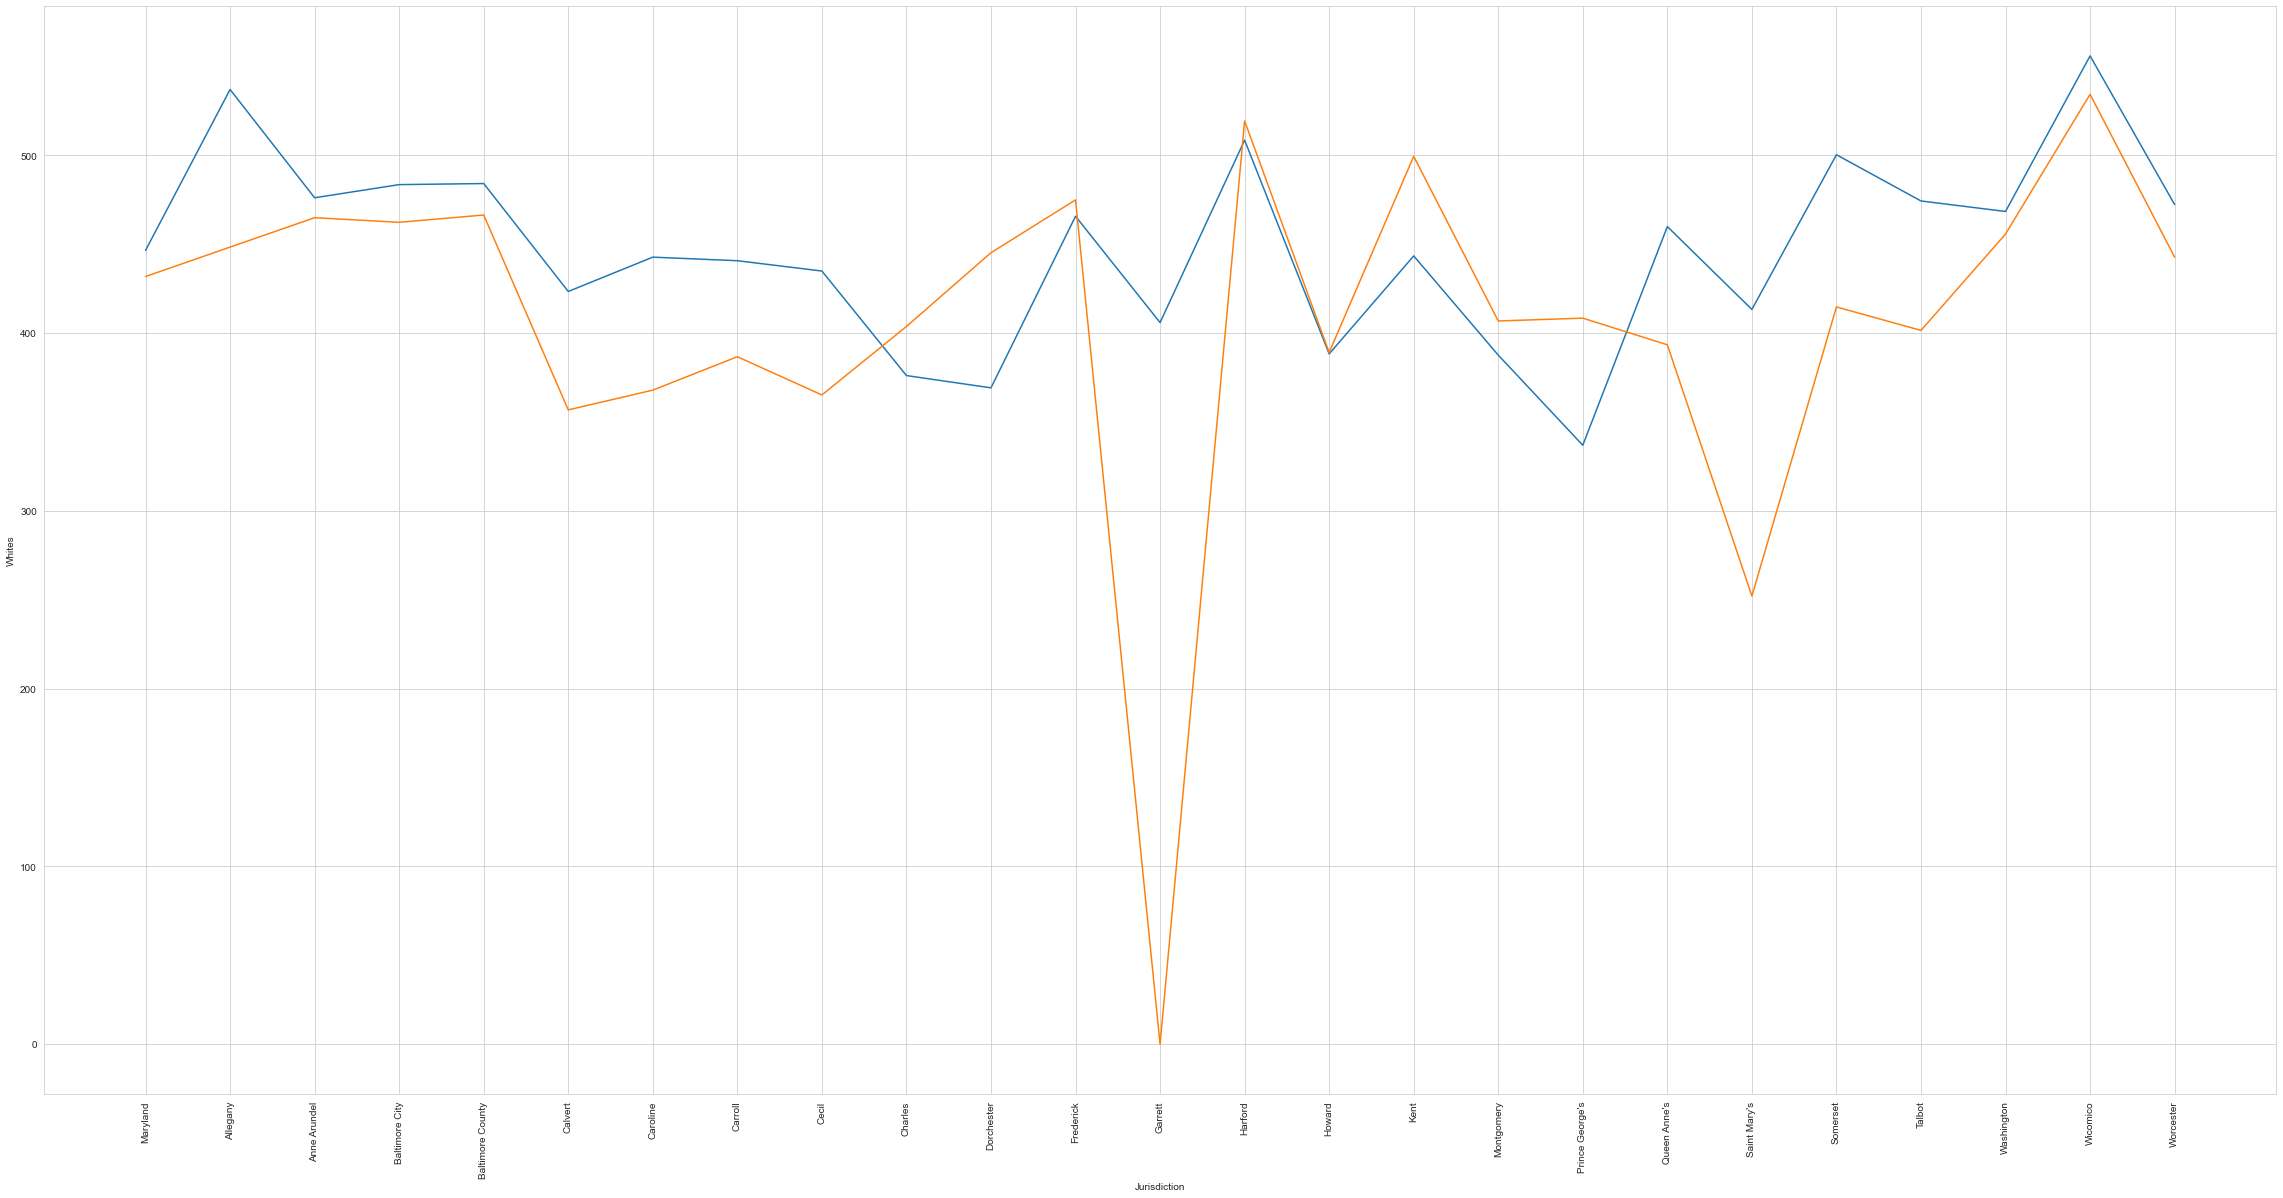

In [230]:
plt.figure(figsize = (40,20))
plt.xticks(rotation = 90)
ax = sb.lineplot(data = ratesW, x = "Jurisdiction", y = "Whites")
ax = sb.lineplot(data = ratesB, x = "Jurisdiction", y = "Blacks")
#ax = sb.lineplot(data = ratesO, x = "Jurisdiction", y = "Other Race")
plt.show()

Analyzing this data shows me that on average, white Americans have a much higher insurance rate than black americans.

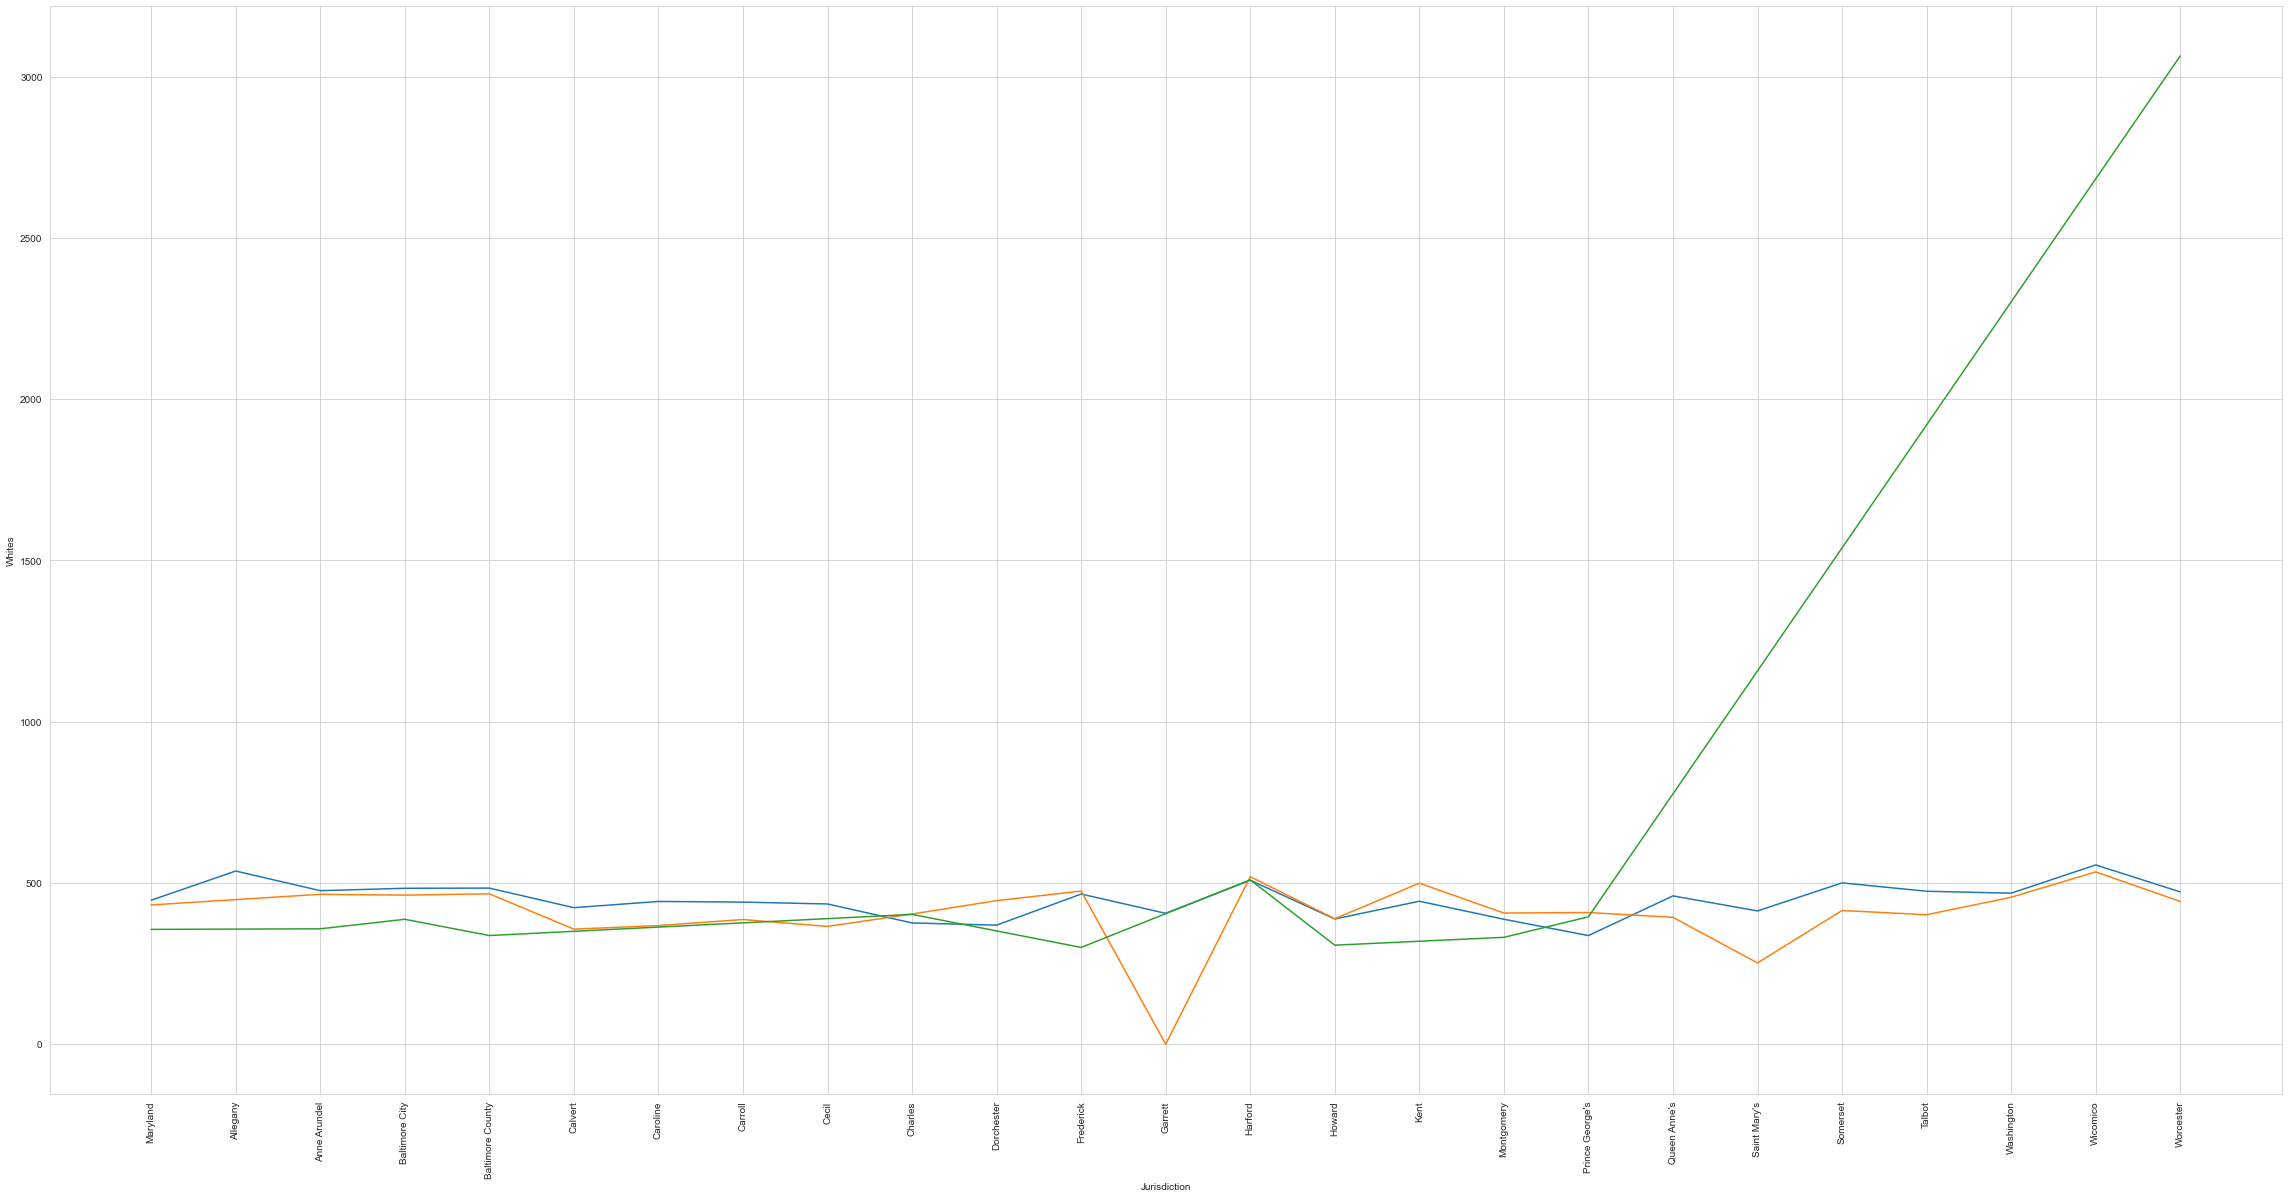

In [231]:
plt.figure(figsize = (40,20))
plt.xticks(rotation = 90)
ax = sb.lineplot(data = ratesW, x = "Jurisdiction", y = "Whites")
ax = sb.lineplot(data = ratesB, x = "Jurisdiction", y = "Blacks")
ax = sb.lineplot(data = ratesO, x = "Jurisdiction", y = "Other Race")
plt.show()

If we include "other races" into the line plot, then we can assume that the insurance rates for "other races" is much higher in different parts of the the U.S

# Population Group Estimates used in the Healthy People 2020 Overview of Health Disparities


In [82]:
popu = pd.read_csv("Distribution_of_COVID-19_Deaths_and_Populations__by_Jurisdiction__Age__and_Race_and_Hispanic_Origin.csv")
popu

Data as of  Start Date    End Date          State  \
0     04/27/2022  01/01/2020  04/23/2022  United States   
1     04/27/2022  01/01/2020  04/23/2022  United States   
2     04/27/2022  01/01/2020  04/23/2022  United States   
3     04/27/2022  01/01/2020  04/23/2022  United States   
4     04/27/2022  01/01/2020  04/23/2022  United States   
...          ...         ...         ...            ...   
3705  04/27/2022  01/01/2020  04/23/2022        Wyoming   
3706  04/27/2022  01/01/2020  04/23/2022        Wyoming   
3707  04/27/2022  01/01/2020  04/23/2022        Wyoming   
3708  04/27/2022  01/01/2020  04/23/2022        Wyoming   
3709  04/27/2022  01/01/2020  04/23/2022        Wyoming   

                                   Race/Hispanic origin  \
0                                    Non-Hispanic White   
1                                    Non-Hispanic Black   
2         Non-Hispanic American Indian or Alaska Native   
3                                    Non-Hispanic Asian   
4     Non-Hispanic Native Hawaiian or Other Pacific ...   
...                                                 ...   
3705                                 Non-Hispanic Asian   
3706                                 Non-Hispanic Black   
3707  Non-Hispanic Native Hawaiian or Other Pacific ...   
3708                                 Non-Hispanic White   
3709                                              Other   

      Count of COVID-19 deaths  Distribution of COVID-19 deaths (%)  \
0                     641055.0                                 64.5   
1                     142003.0                                 14.3   
2                      11020.0                                  1.1   
3                      31068.0                                  3.1   
4                       2130.0                                  0.2   
...                        ...                                  ...   
3705                       0.5                                  1.1   
3706                       0.9                                  1.4   
3707                       0.1                                  0.0   
3708                      73.6                                 45.7   
3709                       0.5                                  0.3   

      Unweighted distribution of population (%)  \
0                                          59.7   
1                                          12.6   
2                                           0.7   
3                                           5.9   
4                                           0.2   
...                                         ...   
3705                                        1.0   
3706                                        1.0   
3707                                        0.1   
3708                                       82.7   
3709                                        1.9   

      Weighted distribution of population (%)  \
0                                        40.8   
1                                        13.5   
2                                         0.4   
3                                         9.6   
4                                         0.2   
...                                       ...   
3705                                      1.0   
3706                                      1.4   
3707                                      0.1   
3708                                     81.7   
3709                                      2.2   

      Difference between COVID-19 and unweighted population %  \
0                                                   4.8         
1                                                   1.7         
2                                                   0.4         
3                                                  -2.8         
4                                                   0.0         
...                                                 ...         
3705                                                0.1         
3706         

In [180]:
popu.head()

Data as of  Start Date    End Date          State  \
0  04/27/2022  01/01/2020  04/23/2022  United States   
1  04/27/2022  01/01/2020  04/23/2022  United States   
2  04/27/2022  01/01/2020  04/23/2022  United States   
3  04/27/2022  01/01/2020  04/23/2022  United States   
4  04/27/2022  01/01/2020  04/23/2022  United States   

                                Race/Hispanic origin  \
0                                 Non-Hispanic White   
1                                 Non-Hispanic Black   
2      Non-Hispanic American Indian or Alaska Native   
3                                 Non-Hispanic Asian   
4  Non-Hispanic Native Hawaiian or Other Pacific ...   

   Count of COVID-19 deaths  Distribution of COVID-19 deaths (%)  \
0                  641055.0                                 64.5   
1                  142003.0                                 14.3   
2                   11020.0                                  1.1   
3                   31068.0                                  3.1   
4                    2130.0                                  0.2   

   Unweighted distribution of population (%)  \
0                                       59.7   
1                                       12.6   
2                                        0.7   
3                                        5.9   
4                                        0.2   

   Weighted distribution of population (%)  \
0                                     40.8   
1                                     13.5   
2                                      0.4   
3                                      9.6   
4                                      0.2   

   Difference between COVID-19 and unweighted population %  \
0                                                4.8         
1                                                1.7         
2                                                0.4         
3                                               -2.8         
4                                                0.0         

   Difference between COVID-19 and weighted population %  \
0                                               23.7       
1                                                0.8       
2                                                0.7       
3                                               -6.5       
4                                                0.0       

               AgeGroup Suppression  
0  All ages, unadjusted         NaN  
1  All ages, unadjusted         NaN  
2  All ages, unadjusted         NaN  
3  All ages, unadjusted         NaN  
4  All ages, unadjusted         NaN

In [184]:
#count the values of the races used in this study
popu["Race/Hispanic origin"].value_counts()

Non-Hispanic White                                        530
Non-Hispanic Asian                                        530
Non-Hispanic American Indian or Alaska Native             530
Non-Hispanic Native Hawaiian or Other Pacific Islander    530
Hispanic                                                  530
Other                                                     530
Non-Hispanic Black                                        530
Name: Race/Hispanic origin, dtype: int64

In [185]:
#count the number of deaths for this study
popu["Count of COVID-19 deaths"].value_counts()

0.0        444
10.0        48
11.0        42
12.0        37
22.0        33
          ... 
1011.0       1
98.8         1
944.1        1
617.2        1
22900.0      1
Name: Count of COVID-19 deaths, Length: 1081, dtype: int64

In [107]:
#access data key
pop["data"]

[['row-d6rh-fyvh.ry8v',
  '00000000-0000-0000-92A0-78C321584799',
  0,
  1651073336,
  None,
  1651073336,
  None,
  '{ }',
  '2022-04-27T00:00:00',
  '2020-01-01T00:00:00',
  '2022-04-23T00:00:00',
  'United States',
  'Non-Hispanic White',
  '641055',
  '64.5',
  '59.7',
  '40.8',
  '4.8',
  '23.7',
  'All ages, unadjusted',
  None],
 ['row-dtnn-q8uq.n6qt',
  '00000000-0000-0000-CFFD-6559F7E5A2E0',
  0,
  1651073336,
  None,
  1651073336,
  None,
  '{ }',
  '2022-04-27T00:00:00',
  '2020-01-01T00:00:00',
  '2022-04-23T00:00:00',
  'United States',
  'Non-Hispanic Black',
  '142003',
  '14.3',
  '12.6',
  '13.5',
  '1.7',
  '0.800000000000001',
  'All ages, unadjusted',
  None],
 ['row-ast8_ejy6.ex47',
  '00000000-0000-0000-2720-FED7F246013A',
  0,
  1651073336,
  None,
  1651073336,
  None,
  '{ }',
  '2022-04-27T00:00:00',
  '2020-01-01T00:00:00',
  '2022-04-23T00:00:00',
  'United States',
  'Non-Hispanic American Indian or Alaska Native',
  '11020',
  '1.1',
  '0.7',
  '0.4',
  '0

In [108]:
#list keys
pop.keys()

dict_keys(['meta', 'data'])

In [117]:
#convert to text
popText

'{\n  "meta" : {\n    "view" : {\n      "id" : "jwta-jxbg",\n      "name" : "Distribution of COVID-19 Deaths and Populations, by Jurisdiction, Age, and Race and Hispanic Origin",\n      "assetType" : "dataset",\n      "attribution" : "NCHS/DVS",\n      "attributionLink" : "https://www.cdc.gov/nchs/nvss/vsrr/covid19/health_disparities.htm",\n      "averageRating" : 0,\n      "category" : "NCHS",\n      "createdAt" : 1595622560,\n      "description" : "This visualization provides data that can be used to illustrate potential differences in the burden of deaths due to COVID-19 by race and ethnicity.",\n      "displayType" : "table",\n      "downloadCount" : 6596,\n      "hideFromCatalog" : false,\n      "hideFromDataJson" : false,\n      "licenseId" : "USGOV_WORKS",\n      "newBackend" : true,\n      "numberOfComments" : 0,\n      "oid" : 34790153,\n      "provenance" : "official",\n      "publicationAppendEnabled" : false,\n      "publicationDate" : 1595957067,\n      "publicationGroup" 

In [116]:
#print the text
print(popText)

{
  "meta" : {
    "view" : {
      "id" : "jwta-jxbg",
      "name" : "Distribution of COVID-19 Deaths and Populations, by Jurisdiction, Age, and Race and Hispanic Origin",
      "assetType" : "dataset",
      "attribution" : "NCHS/DVS",
      "attributionLink" : "https://www.cdc.gov/nchs/nvss/vsrr/covid19/health_disparities.htm",
      "averageRating" : 0,
      "category" : "NCHS",
      "createdAt" : 1595622560,
      "description" : "This visualization provides data that can be used to illustrate potential differences in the burden of deaths due to COVID-19 by race and ethnicity.",
      "displayType" : "table",
      "downloadCount" : 6596,
      "hideFromCatalog" : false,
      "hideFromDataJson" : false,
      "licenseId" : "USGOV_WORKS",
      "newBackend" : true,
      "numberOfComments" : 0,
      "oid" : 34790153,
      "provenance" : "official",
      "publicationAppendEnabled" : false,
      "publicationDate" : 1595957067,
      "publicationGroup" : 17370342,
      "publi

In [125]:
print(re.findall('colorado\w+',popText))

[]


In [153]:
deXML

<html><body><response><row><row _address="https://data.cdc.gov/resource/dmzy-x2ad/row-f6af_ennt~74ma" _id="row-f6af_ennt~74ma" _position="0" _uuid="00000000-0000-0000-7079-E56BE517858B"><indicator>Delay or nonreceipt of needed medical care, nonreceipt of needed prescription drugs, or nonreceipt of needed dental care during the past 12 months due to cost</indicator><panel>Delay or nonreceipt of needed medical care due to cost</panel><panel_num>1</panel_num><unit>Percent, crude</unit><unit_num>1</unit_num><stub_name>Total</stub_name><stub_name_num>0</stub_name_num><stub_label>All persons</stub_label><stub_label_num>0.1</stub_label_num><year>1997</year><year_num>1</year_num><age>All ages</age><age_num>0.1</age_num><estimate>8.3</estimate><se>0.1</se></row><row _address="https://data.cdc.gov/resource/dmzy-x2ad/row-27cp.9xxg-9v2c" _id="row-27cp.9xxg-9v2c" _position="0" _uuid="00000000-0000-0000-A47D-3E52BE93AF02"><indicator>Delay or nonreceipt of needed medical care, nonreceipt of needed pr

In [154]:
deXML.tabledelayXML

In [156]:
deXML.find_all("table")

[]